<a href="https://www.kaggle.com/code/alejandravillarreal/isic-skin-cancer-eda?scriptVersionId=193131981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ISIC 2024 - 🏥 Skin Cancer 🔎 EDA

This notebook contains an introduction of the Exploratory Data Analysis 🤗


## **ISIC Links:**

**🏥 ISIC — Skin Cancer 🔎 EDA**

Story: https://medium.com/@alejandra.nohemi.villarreal/isic-skin-cancer-eda-872245ba1a37

**ISIC 2024 - 🏥 Skin Cancer 🔎 EDA**

GitHub: https://github.com/alejandraNvillarreal/ISIC-Skin-Cancer/blob/main/isic-skin-cancer-eda.ipynb



## **Other projects:**

**🥣 Cereals - 🍎 Nutritional 🔍 EDA using R**

R: https://www.kaggle.com/code/alejandravillarreal/cereals-nutritional-eda-using-r

**ARC - Applying 🧮 algebra to EDA 🔎**

Python: https://www.kaggle.com/code/alejandravillarreal/arc-applying-algebra-to-eda



## **Credits**:

Inspo: https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales

## Libraries

In [1]:
# Visualizations
library(hrbrthemes)
library(ggthemes)
library(ggplot2)

# Data Manipulation
library(dplyr)

# Statistics
library(DescTools)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Import Training data

In [2]:
data <- read.csv("../input/isic-2024-challenge/train-metadata.csv", stringsAsFactors = FALSE)
# Viewing the first 6 DataFrame records
head(data, 6)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,⋯,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ISIC_0015670,0,IP_1235828,60,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.24442,⋯,,Benign,Benign,,,,,,NA,97.517282
2,ISIC_0015845,0,IP_8170065,60,male,head/neck,1.10,TBP tile: close-up,3D: white,31.71257,⋯,IL_6727506,Benign,Benign,,,,,,NA,3.141455
3,ISIC_0015864,0,IP_6724798,60,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.57583,⋯,,Benign,Benign,,,,,,NA,99.804040
4,ISIC_0015902,0,IP_4111386,65,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.24233,⋯,,Benign,Benign,,,,,,NA,99.989998
5,ISIC_0024200,0,IP_8313778,55,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.72552,⋯,,Benign,Benign,,,,,,NA,70.442510
6,ISIC_0035502,0,IP_3026693,75,female,head/neck,2.54,TBP tile: close-up,3D: white,22.12918,⋯,,Benign,Benign,,,,,,NA,99.619603


In [3]:
summary(data)

   isic_id              target           patient_id          age_approx   
 Length:401059      Min.   :0.0000000   Length:401059      Min.   : 5.00  
 Class :character   1st Qu.:0.0000000   Class :character   1st Qu.:50.00  
 Mode  :character   Median :0.0000000   Mode  :character   Median :60.00  
                    Mean   :0.0009799                      Mean   :58.01  
                    3rd Qu.:0.0000000                      3rd Qu.:70.00  
                    Max.   :1.0000000                      Max.   :85.00  
                                                           NA's   :2798   
     sex            anatom_site_general clin_size_long_diam_mm
 Length:401059      Length:401059       Min.   : 1.000        
 Class :character   Class :character    1st Qu.: 2.840        
 Mode  :character   Mode  :character    Median : 3.370        
                                        Mean   : 3.931        
                                        3rd Qu.: 4.380        
                      

## Split data by target

In [4]:
benign_data <- filter(data, target == 0)
summary(benign_data)

   isic_id              target   patient_id          age_approx   
 Length:400666      Min.   :0   Length:400666      Min.   : 5.00  
 Class :character   1st Qu.:0   Class :character   1st Qu.:50.00  
 Mode  :character   Median :0   Mode  :character   Median :60.00  
                    Mean   :0                      Mean   :58.01  
                    3rd Qu.:0                      3rd Qu.:70.00  
                    Max.   :0                      Max.   :85.00  
                                                   NA's   :2795   
     sex            anatom_site_general clin_size_long_diam_mm
 Length:400666      Length:400666       Min.   : 1.000        
 Class :character   Class :character    1st Qu.: 2.840        
 Mode  :character   Mode  :character    Median : 3.370        
                                        Mean   : 3.929        
                                        3rd Qu.: 4.380        
                                        Max.   :28.400        
                       

In [5]:
malignant_data <- filter(data, target == 1)
summary(malignant_data)

   isic_id              target   patient_id          age_approx   
 Length:393         Min.   :1   Length:393         Min.   :20.00  
 Class :character   1st Qu.:1   Class :character   1st Qu.:55.00  
 Mode  :character   Median :1   Mode  :character   Median :60.00  
                    Mean   :1                      Mean   :61.37  
                    3rd Qu.:1                      3rd Qu.:70.00  
                    Max.   :1                      Max.   :85.00  
                                                   NA's   :3      
     sex            anatom_site_general clin_size_long_diam_mm
 Length:393         Length:393          Min.   : 1.01         
 Class :character   Class :character    1st Qu.: 2.40         
 Mode  :character   Mode  :character    Median : 5.14         
                                        Mean   : 5.75         
                                        3rd Qu.: 7.87         
                                        Max.   :18.94         
                       

## Age by target

In [6]:
freq_ben_age <- data.frame(cbind(Frequency = table(benign_data$age_approx), Percent = prop.table(table(benign_data$age_approx)) * 100))
freq_ben_age <- freq_ben_age[order(freq_ben_age$Frequency, decreasing=TRUE), ]
freq_ben_age

,Frequency,Percent
,<dbl>,<dbl>
55,58077,1.459694e+01
65,54879,1.379316e+01
60,54023,1.357802e+01
50,47897,1.203832e+01
70,39726,9.984643e+00
40,31282,7.862347e+00
75,30777,7.735422e+00
45,23553,5.919758e+00
80,21072,5.296189e+00


In [7]:
freq_mal_age <- data.frame(cbind(Frequency = table(malignant_data$age_approx), Percent = prop.table(table(malignant_data$age_approx)) * 100))
freq_mal_age <- freq_mal_age[order(freq_mal_age$Frequency, decreasing=TRUE), ]
freq_mal_age

,Frequency,Percent
,<dbl>,<dbl>
60,86,22.0512821
65,67,17.1794872
70,49,12.5641026
55,46,11.7948718
45,27,6.9230769
50,27,6.9230769
75,24,6.1538462
80,24,6.1538462
40,15,3.8461538


In [8]:
options(repr.plot.width = 14, repr.plot.height = 10)

df <- freq_ben_age
a <- ggplot(data = df, mapping = aes(x = Frequency, y = row.names(df))) +
         geom_bar(stat = "identity", mapping = aes(fill = row.names(df), color = row.names(df)), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=Frequency), fill = "#006400", size = 5, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("Patient age distribution - Benign data") +
         xlab(" ") +
         ylab("") +
         theme_ipsum(base_family="sans") +
         coord_flip() +
         theme(plot.background = element_rect(fill = "#F8F8FF", color = "purple", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 20, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 20, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 16, face = "bold"),
               axis.text.y = element_text(size = 16, face = "bold"),
               )

df1 <- freq_mal_age
b <- ggplot(data = df1, mapping = aes(x = Frequency, y = row.names(df1))) +
         geom_bar(stat = "identity", mapping = aes(fill = row.names(df1), color = row.names(df1)), alpha = .7, size = 1.1) +
         geom_label(mapping = aes(label=Frequency), fill = "red", size = 5, color = "white", fontface = "bold", hjust=.7) +
         ggtitle("Patient age distribution - Malignant data") +
         xlab(" ") +
         ylab("") +
         theme_ipsum(base_family="sans") +
         coord_flip() +
         theme(plot.background = element_rect(fill = "#fffcfd", color = "red", size = 1.1),
               plot.title = element_text(size = 24, hjust = .5, face = "bold"),
               axis.title.x = element_text(size = 20, hjust = .5, face = "italic"),
               axis.title.y = element_text(size = 20, hjust = .5, face = "italic"),
               axis.text.x = element_text(size = 16, face = "bold"),
               axis.text.y = element_text(size = 16, face = "bold"),
               )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


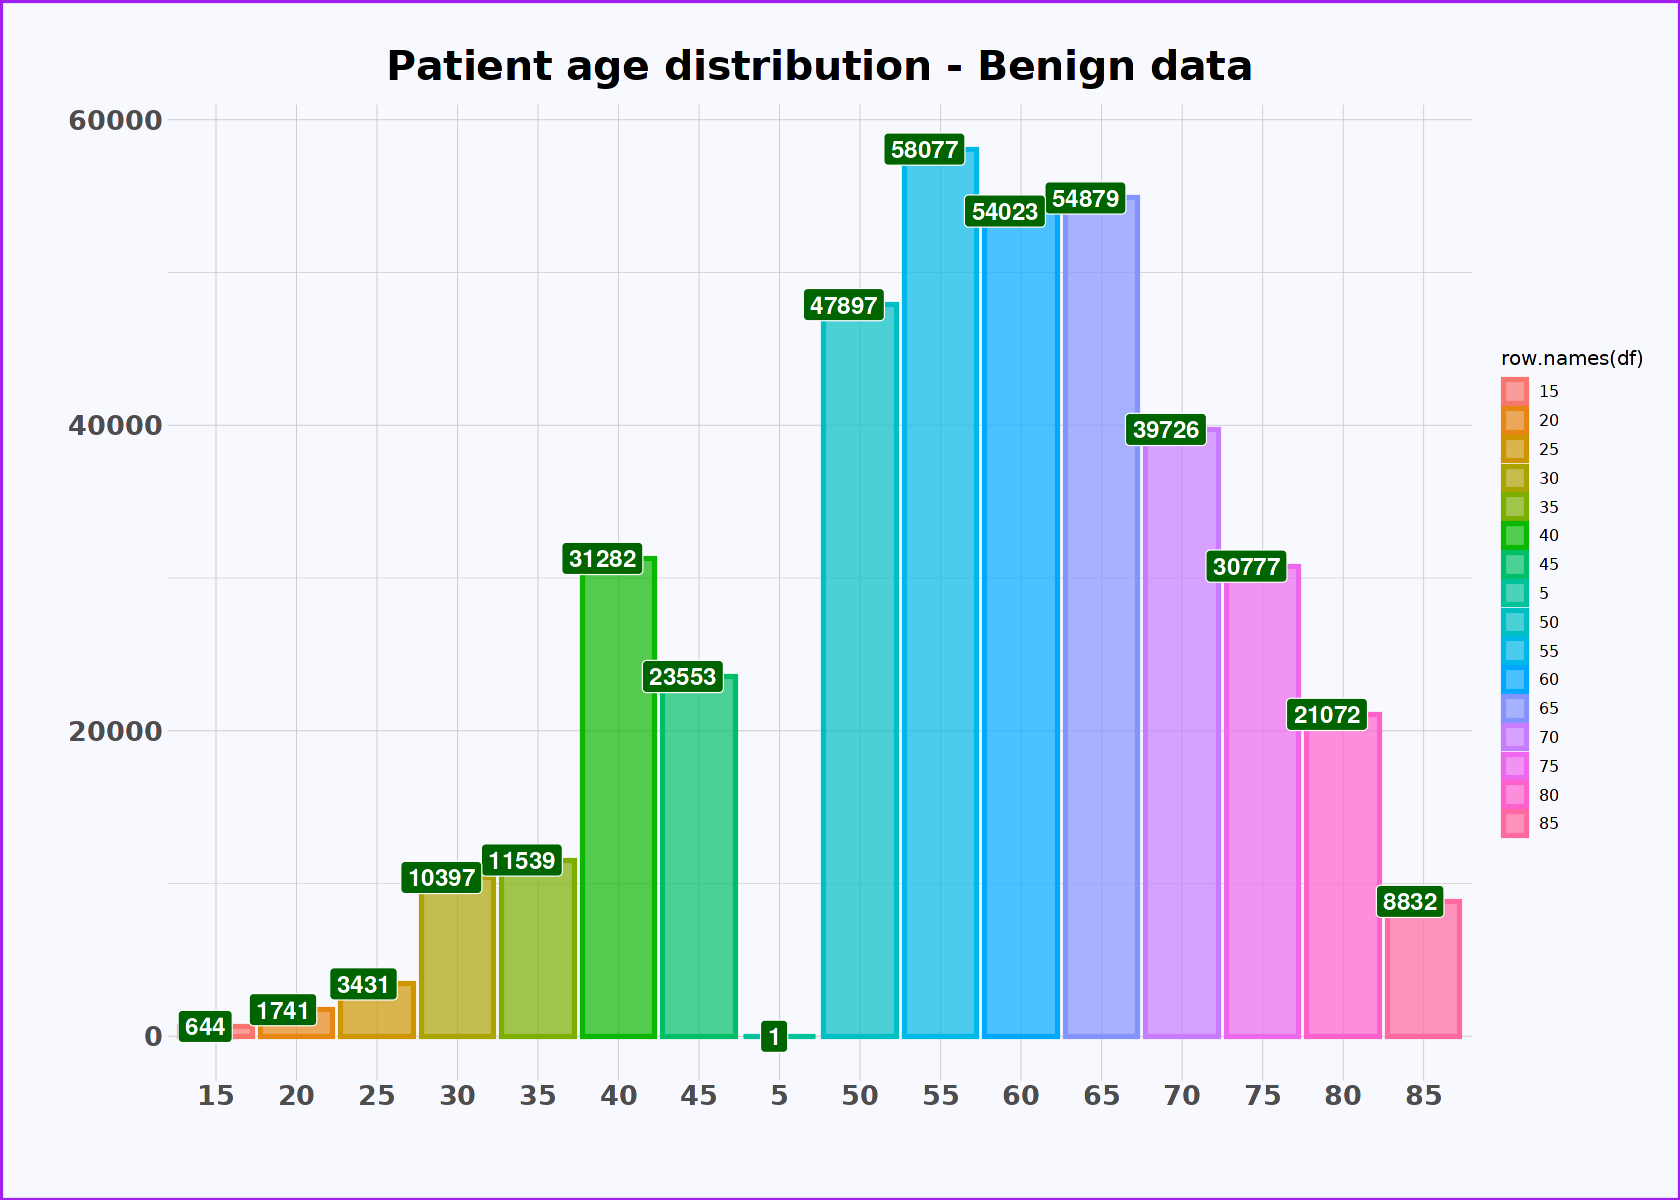

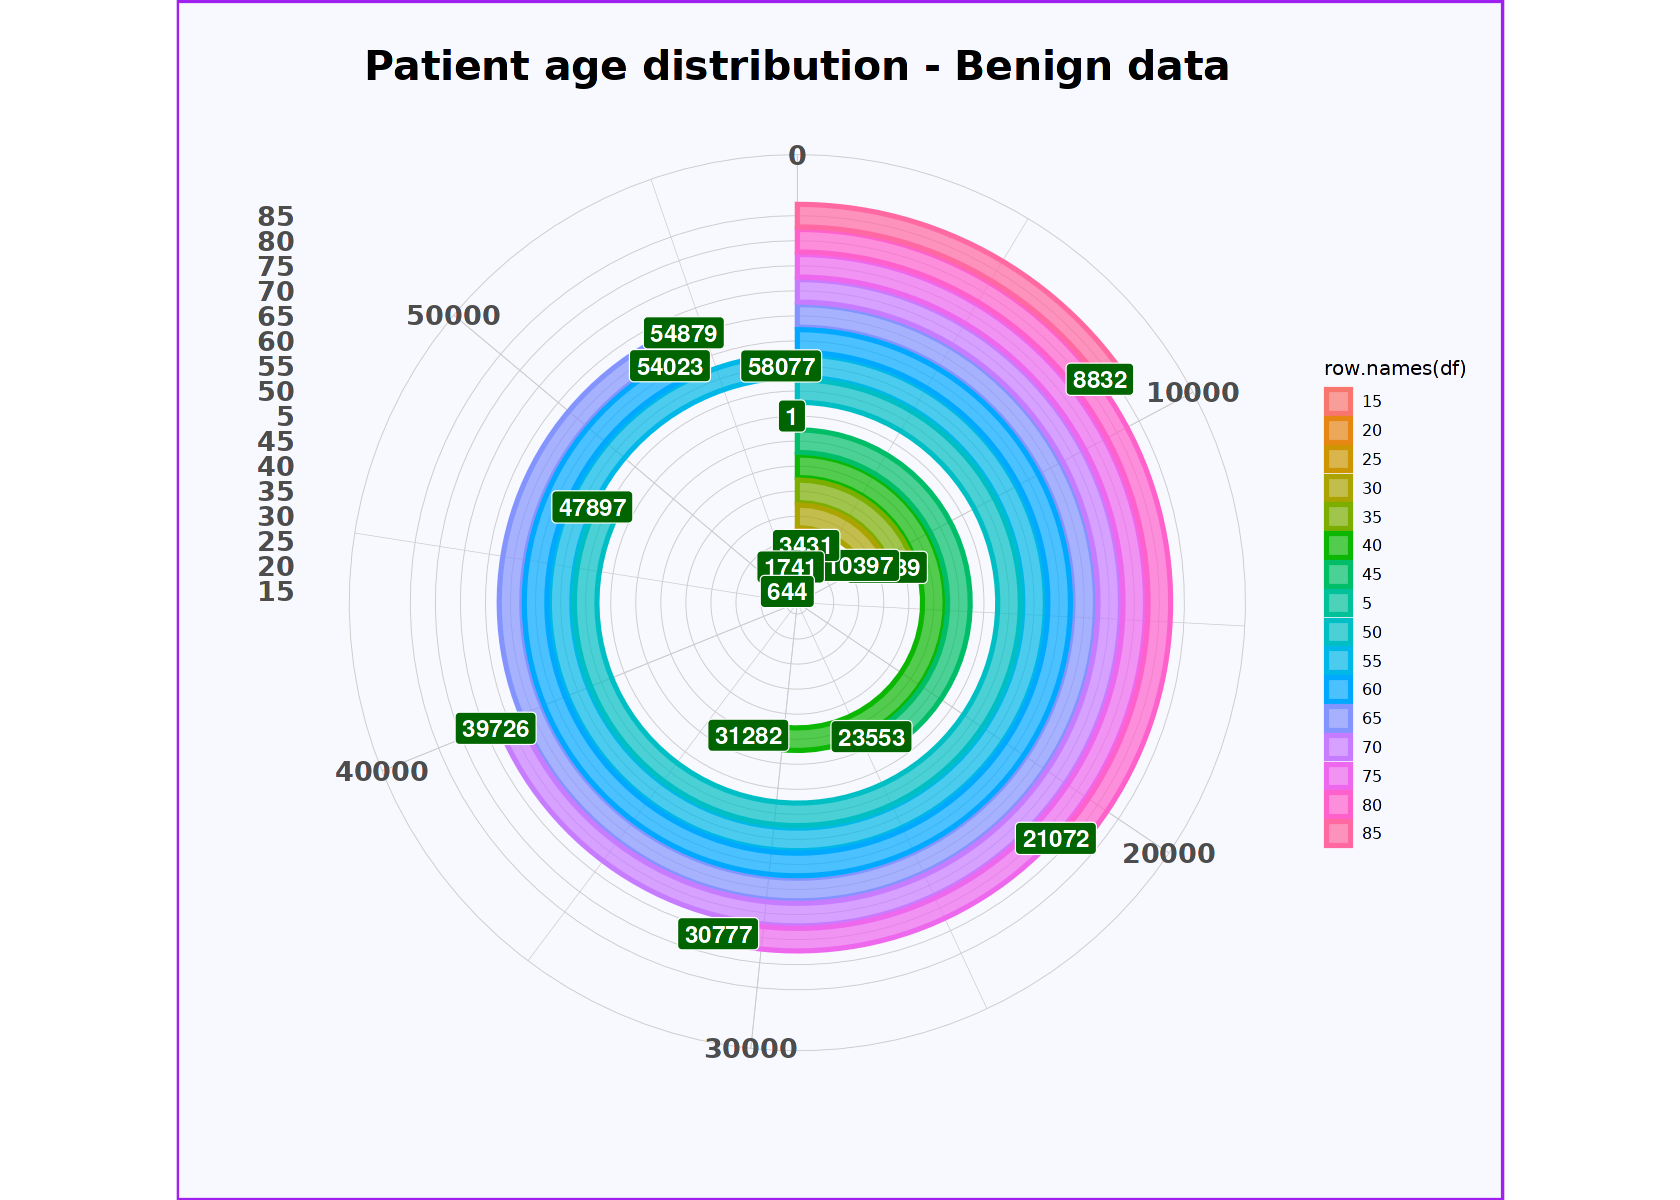

In [9]:
plot(a)
plot(a+ coord_polar())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


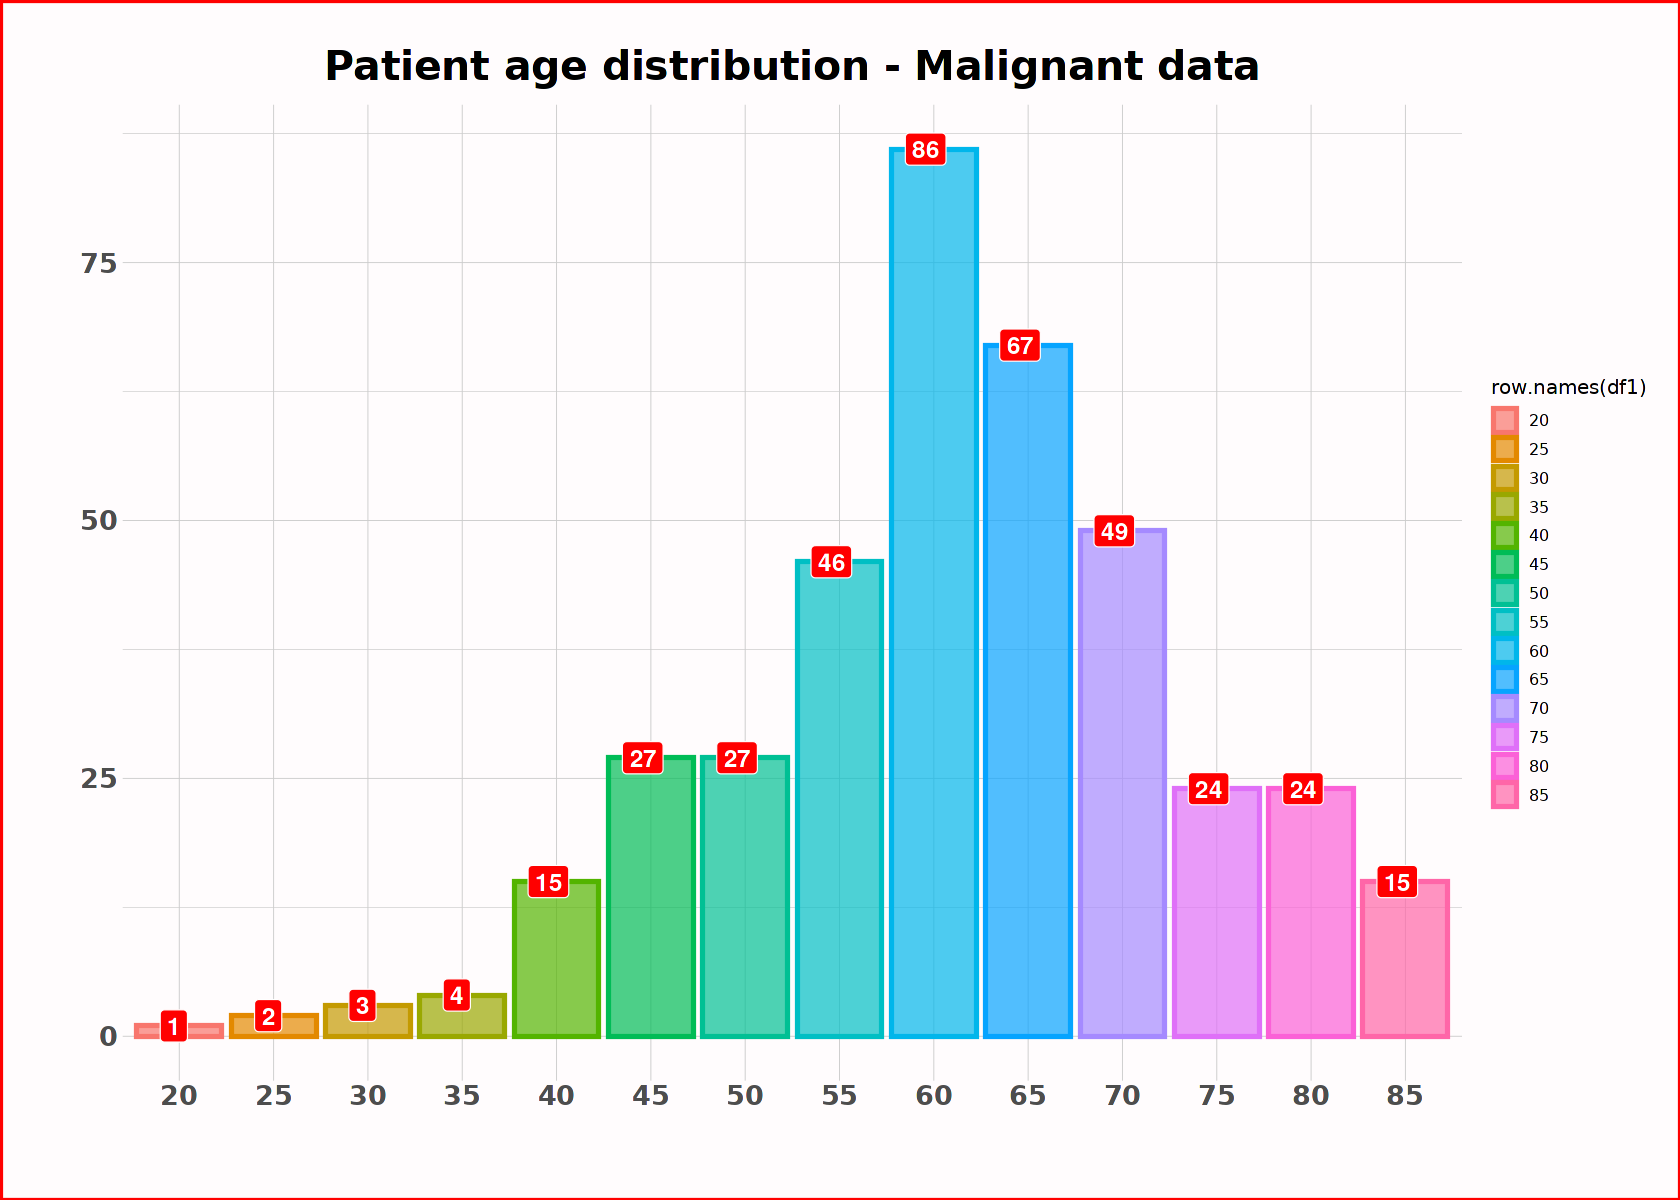

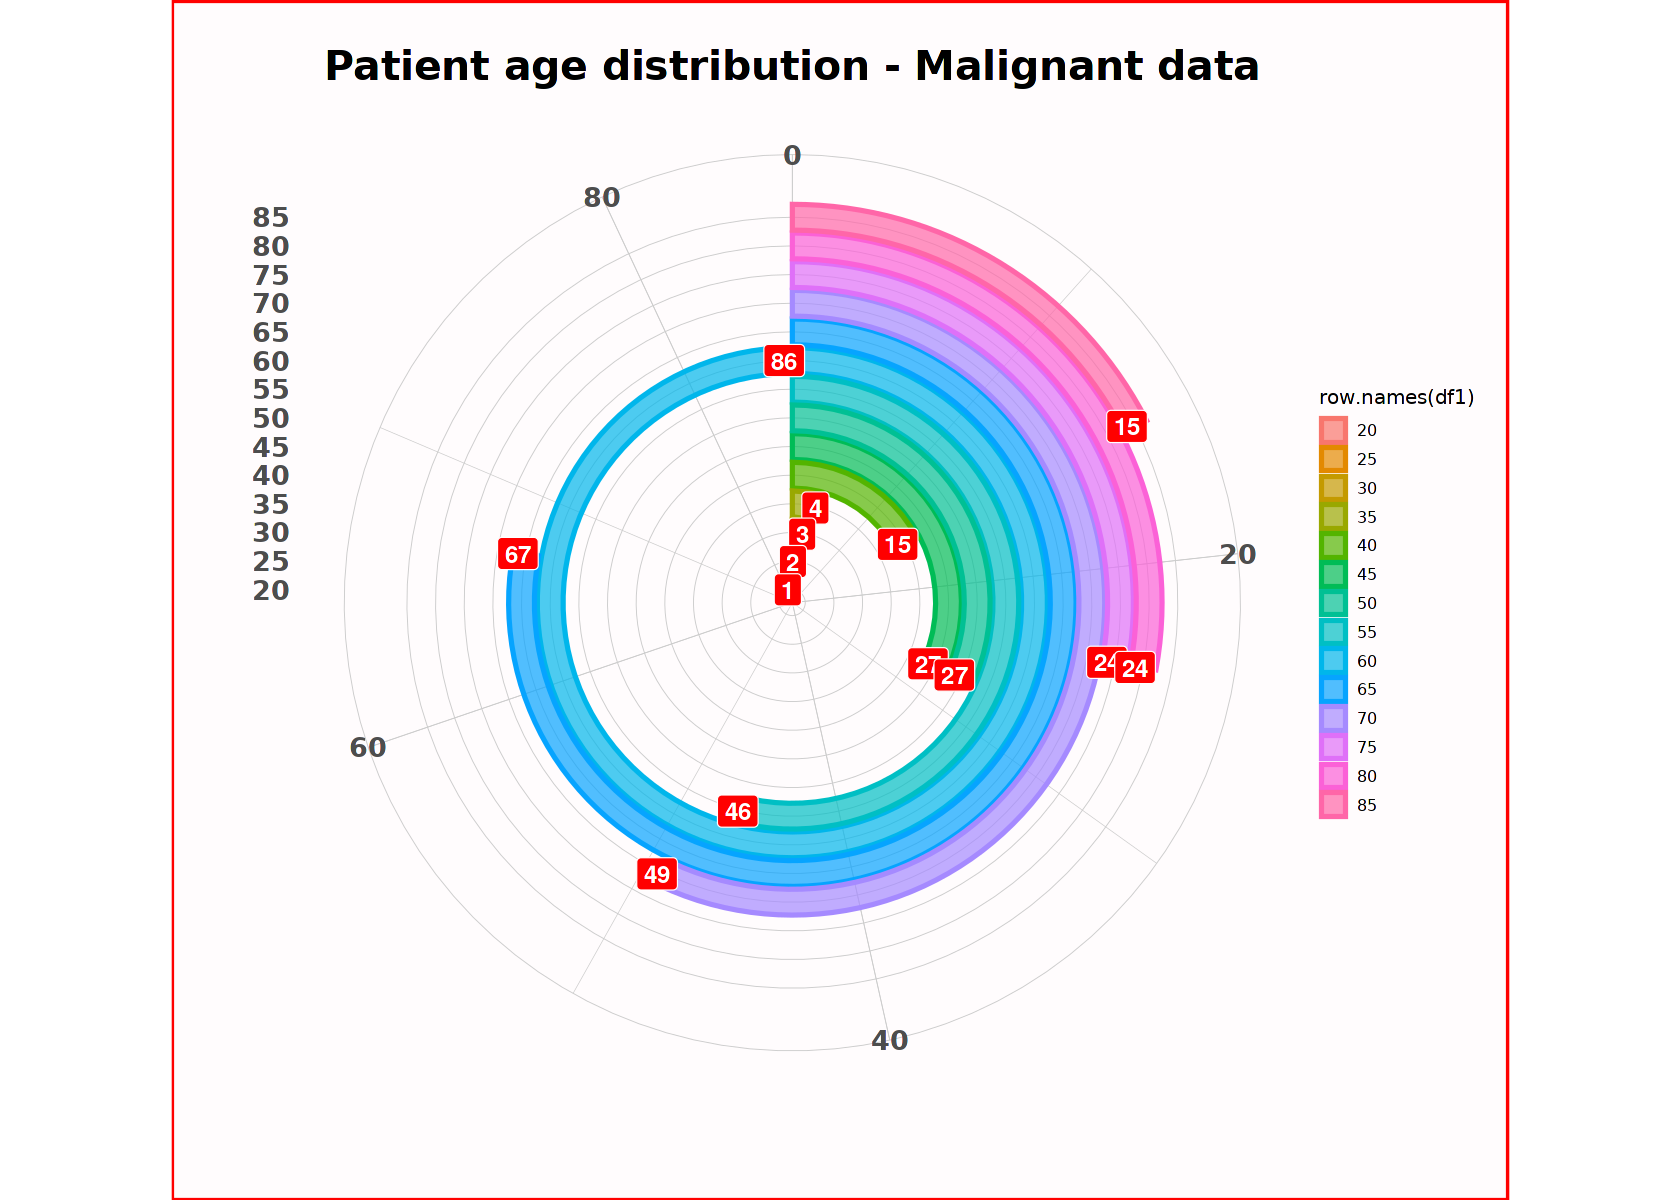

In [10]:
plot(b)
plot(b+ coord_polar())

## frequent anatom_site_general

In [11]:
freq_ben_anato <- data.frame(cbind(Frequency = table(benign_data$anatom_site_general), Percent = prop.table(table(benign_data$anatom_site_general)) * 100))
freq_ben_anato <- head(freq_ben_anato[order(freq_ben_anato$Frequency, decreasing = T), ], 5)
freq_ben_anato <- head(freq_ben_anato[order(freq_ben_anato$Frequency, decreasing = T), ], 5)
freq_ben_anato

,Frequency,Percent
,<dbl>,<dbl>
posterior torso,121799,30.399135
lower extremity,102955,25.695966
anterior torso,87688,21.885561
upper extremity,70500,17.595703
head/neck,11968,2.987027


In [12]:
freq_mal_anato <- data.frame(cbind(Frequency = table(malignant_data$anatom_site_general), Percent = prop.table(table(malignant_data$anatom_site_general)) * 100))
freq_mal_anato <- head(freq_mal_anato[order(freq_mal_anato$Frequency, decreasing = T), ], 5)
freq_mal_anato <- head(freq_mal_anato[order(freq_mal_anato$Frequency, decreasing = T), ], 5)
freq_mal_anato

,Frequency,Percent
,<dbl>,<dbl>
posterior torso,103,26.20865
anterior torso,82,20.86514
head/neck,78,19.84733
lower extremity,73,18.57506
upper extremity,57,14.50382


In [13]:
a <- ggplot(data = freq_ben_anato, mapping = aes(x = row.names(freq_ben_anato), y = Frequency)) +
         geom_segment(aes(xend=row.names(freq_ben_anato), yend=0, color = row.names(freq_ben_anato)), size = 2, alpha = .5) +
         geom_point(mapping = aes(fill = row.names(freq_ben_anato)), size = 4, shape = 21) +
         coord_flip() +
         theme_economist() +
         ggtitle("Benign - Frequency of Anatom_site_general") +
         xlab("") +
         ylab("") +
         theme(plot.background = element_rect(fill = "#F8F8FF", color = "purple"),
               axis.title.x = element_text(size = 13, face = "italic"),
               axis.title.y = element_text(size = 13,face = "italic"),
               axis.text.x = element_text(size = 13, face = "bold"),
               axis.text.y = element_text(size = 13, face = "bold"),
               legend.position = "none")

b <- ggplot(data = freq_mal_anato, mapping = aes(x = row.names(freq_mal_anato), y = Frequency)) +
         geom_segment(aes(xend=row.names(freq_mal_anato), yend=0, color = row.names(freq_mal_anato)), size = 2, alpha = .5) +
         geom_point(mapping = aes(fill = row.names(freq_mal_anato)), size = 4, shape = 21) +
         coord_flip() +
         theme_economist() +
         ggtitle("Malignant - Frequency of Anatom_site_general") +
         xlab("") +
         ylab("") +
         theme(plot.background = element_rect(fill = "#fffcfd", color = "red"),
               axis.title.x = element_text(size = 13, face = "italic"),
               axis.title.y = element_text(size = 13,face = "italic"),
               axis.text.x = element_text(size = 13, face = "bold"),
               axis.text.y = element_text(size = 13, face = "bold"),
               legend.position = "none")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


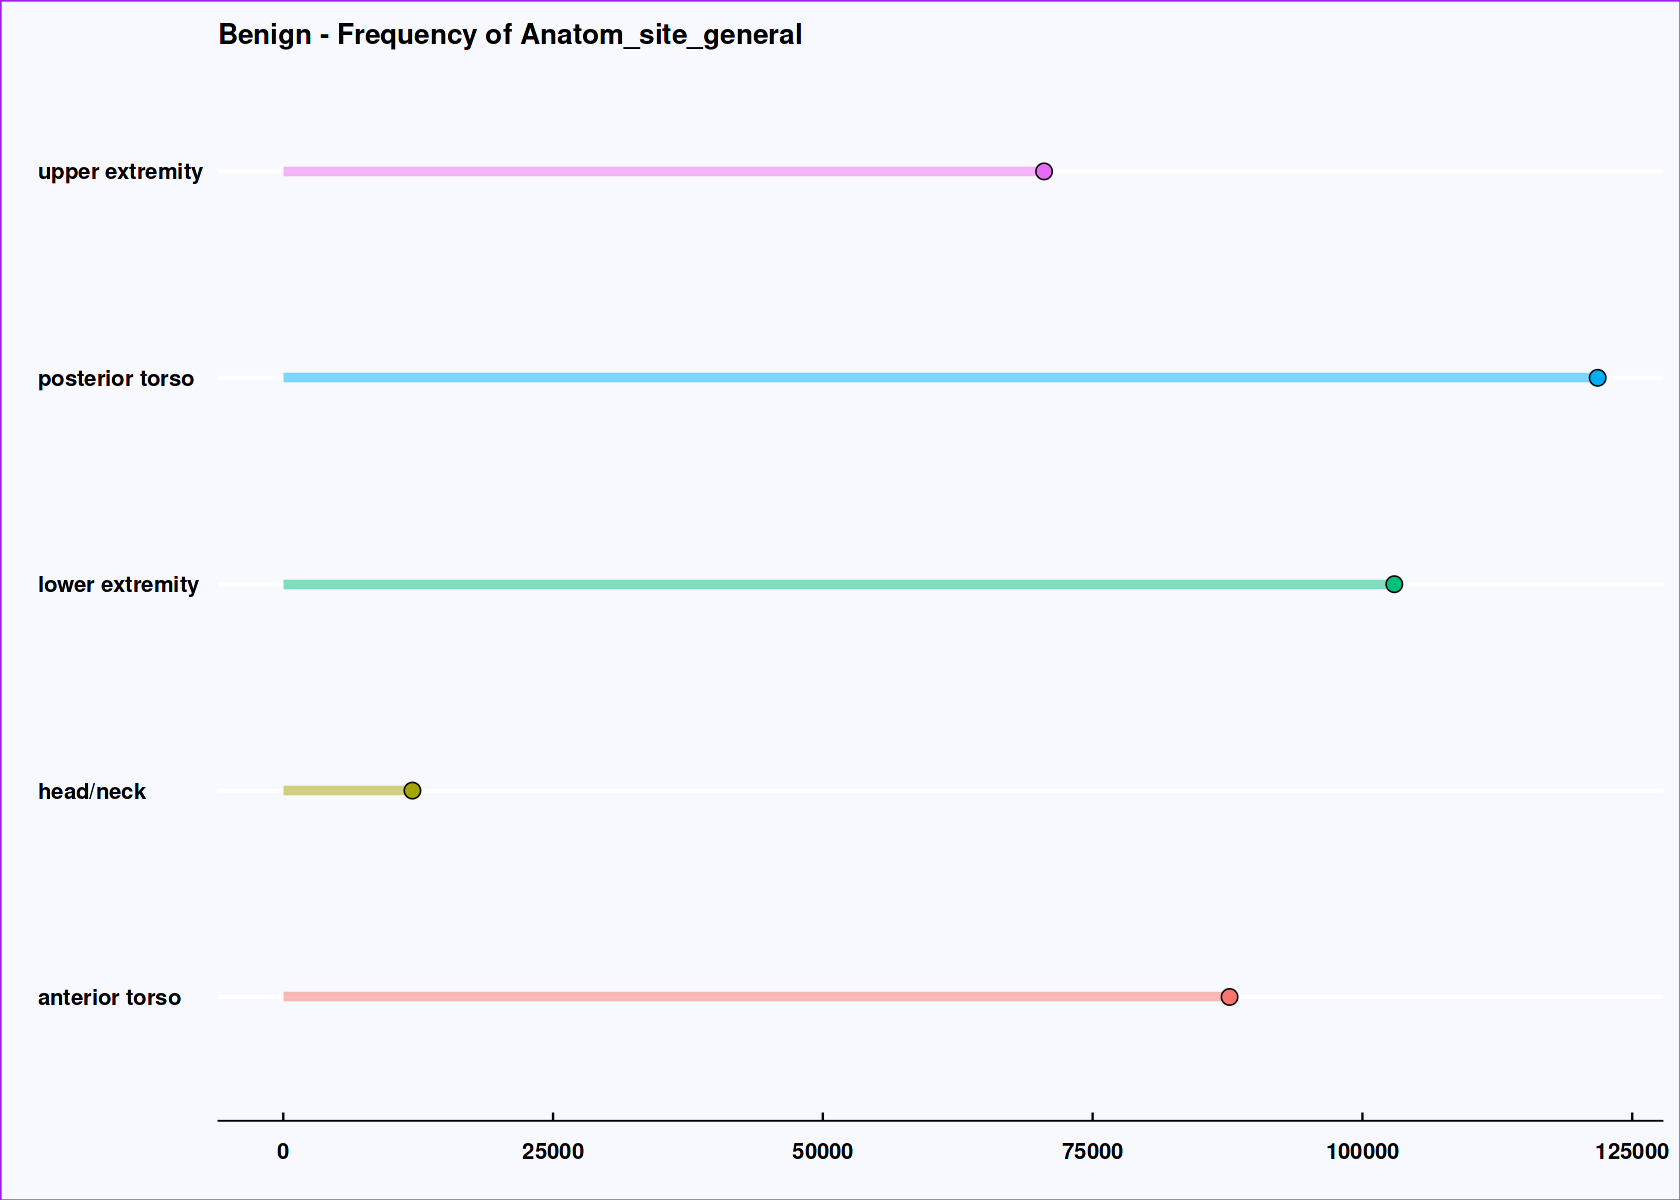

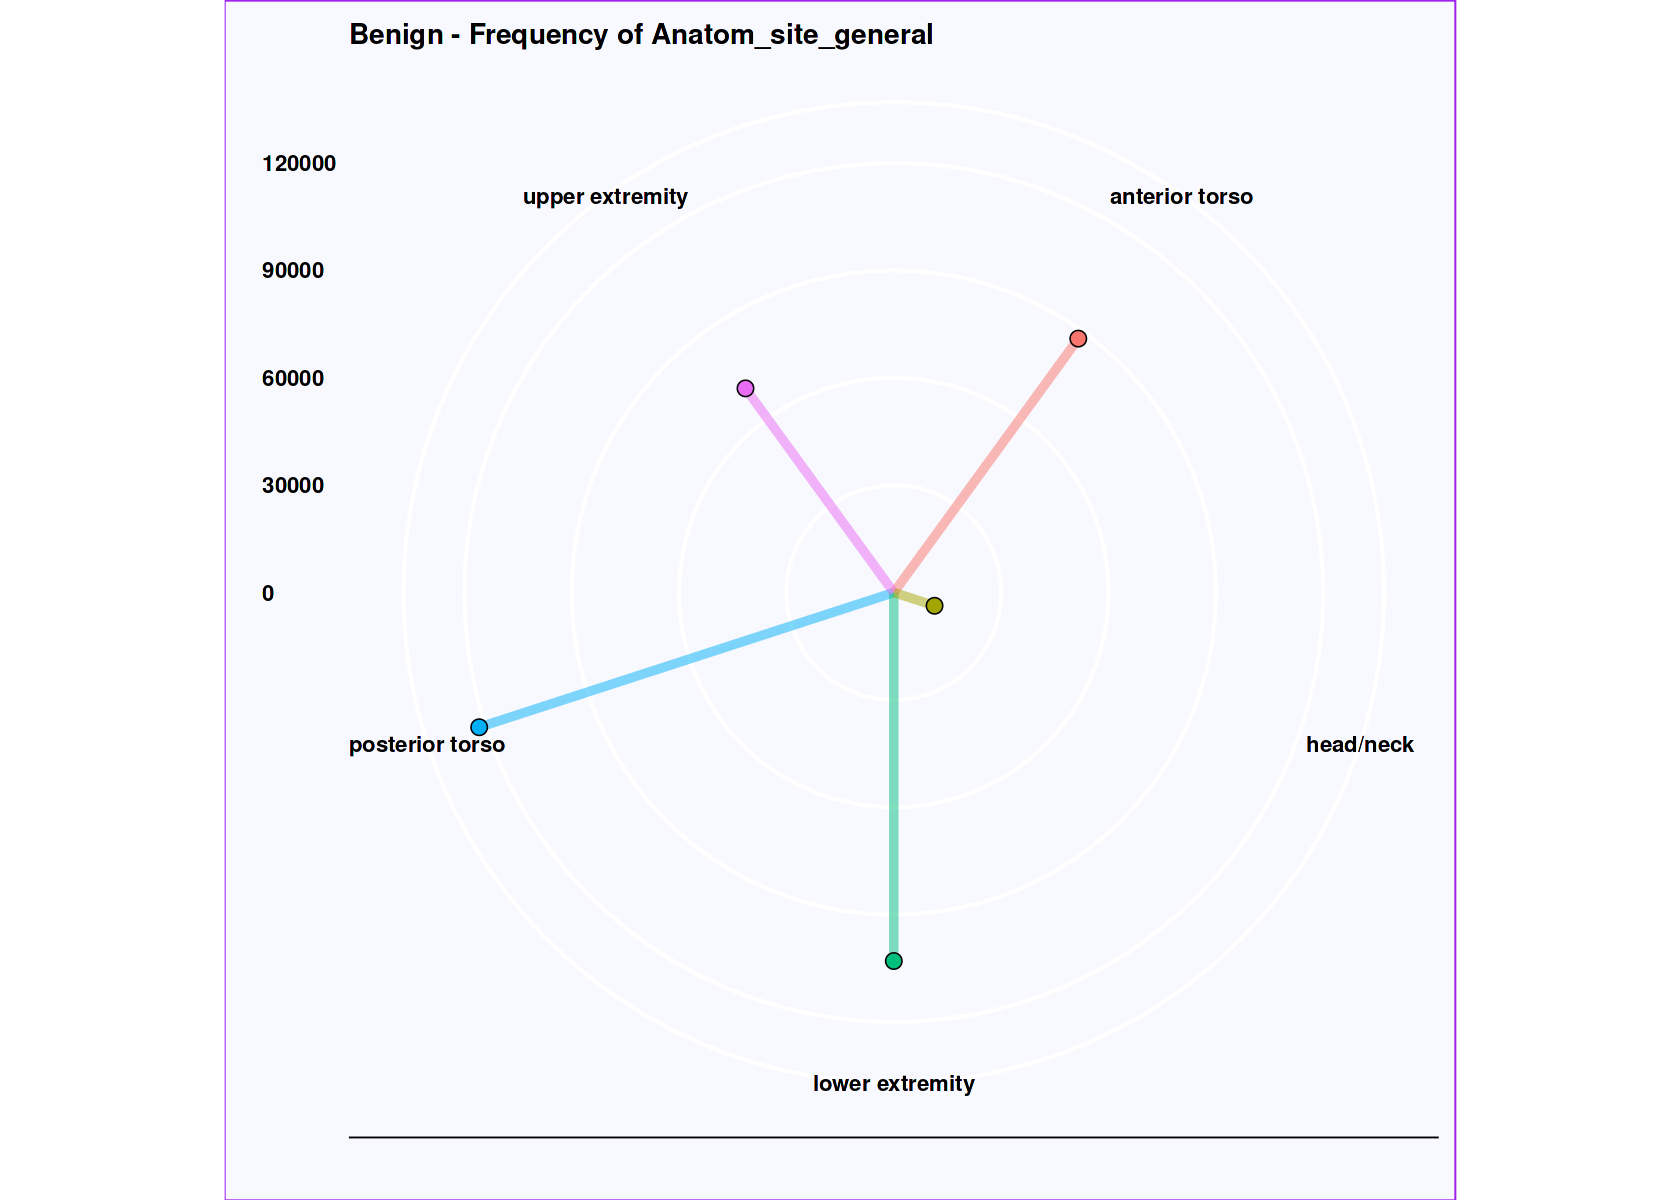

In [14]:
plot(a)
plot(a + coord_polar())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


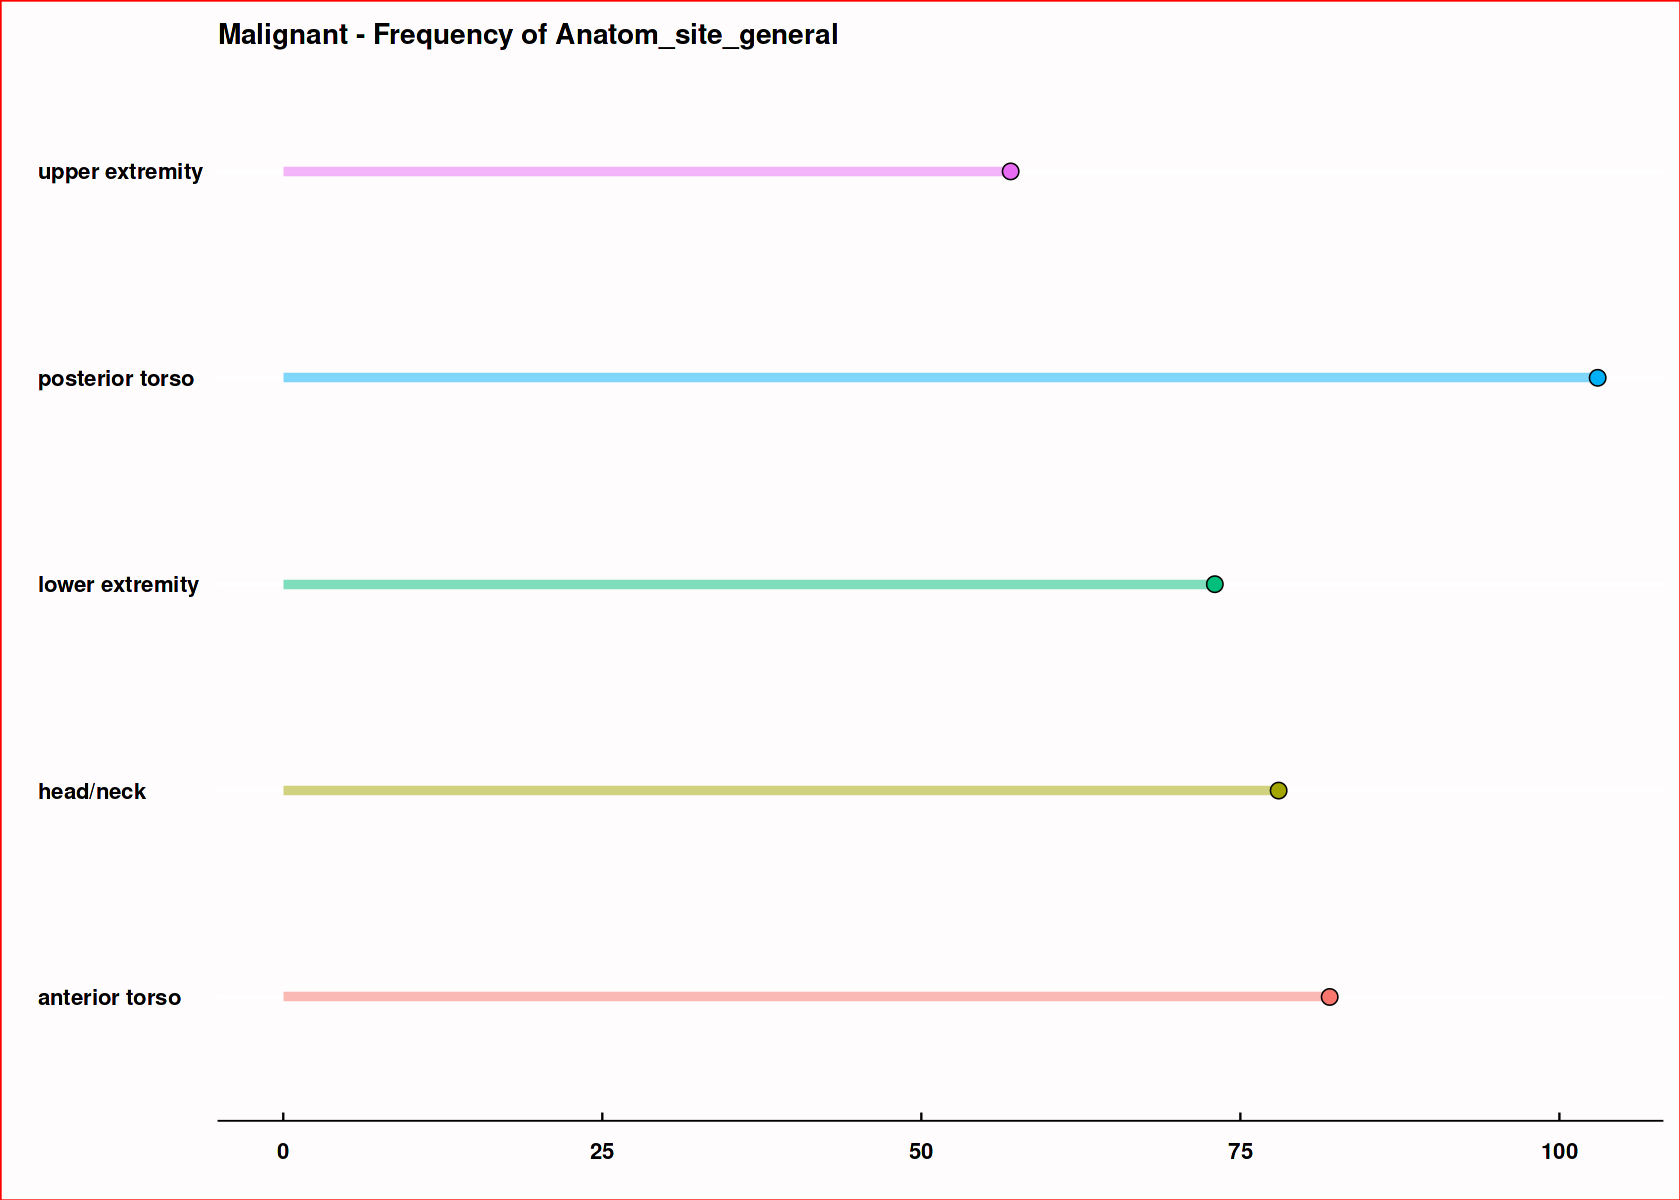

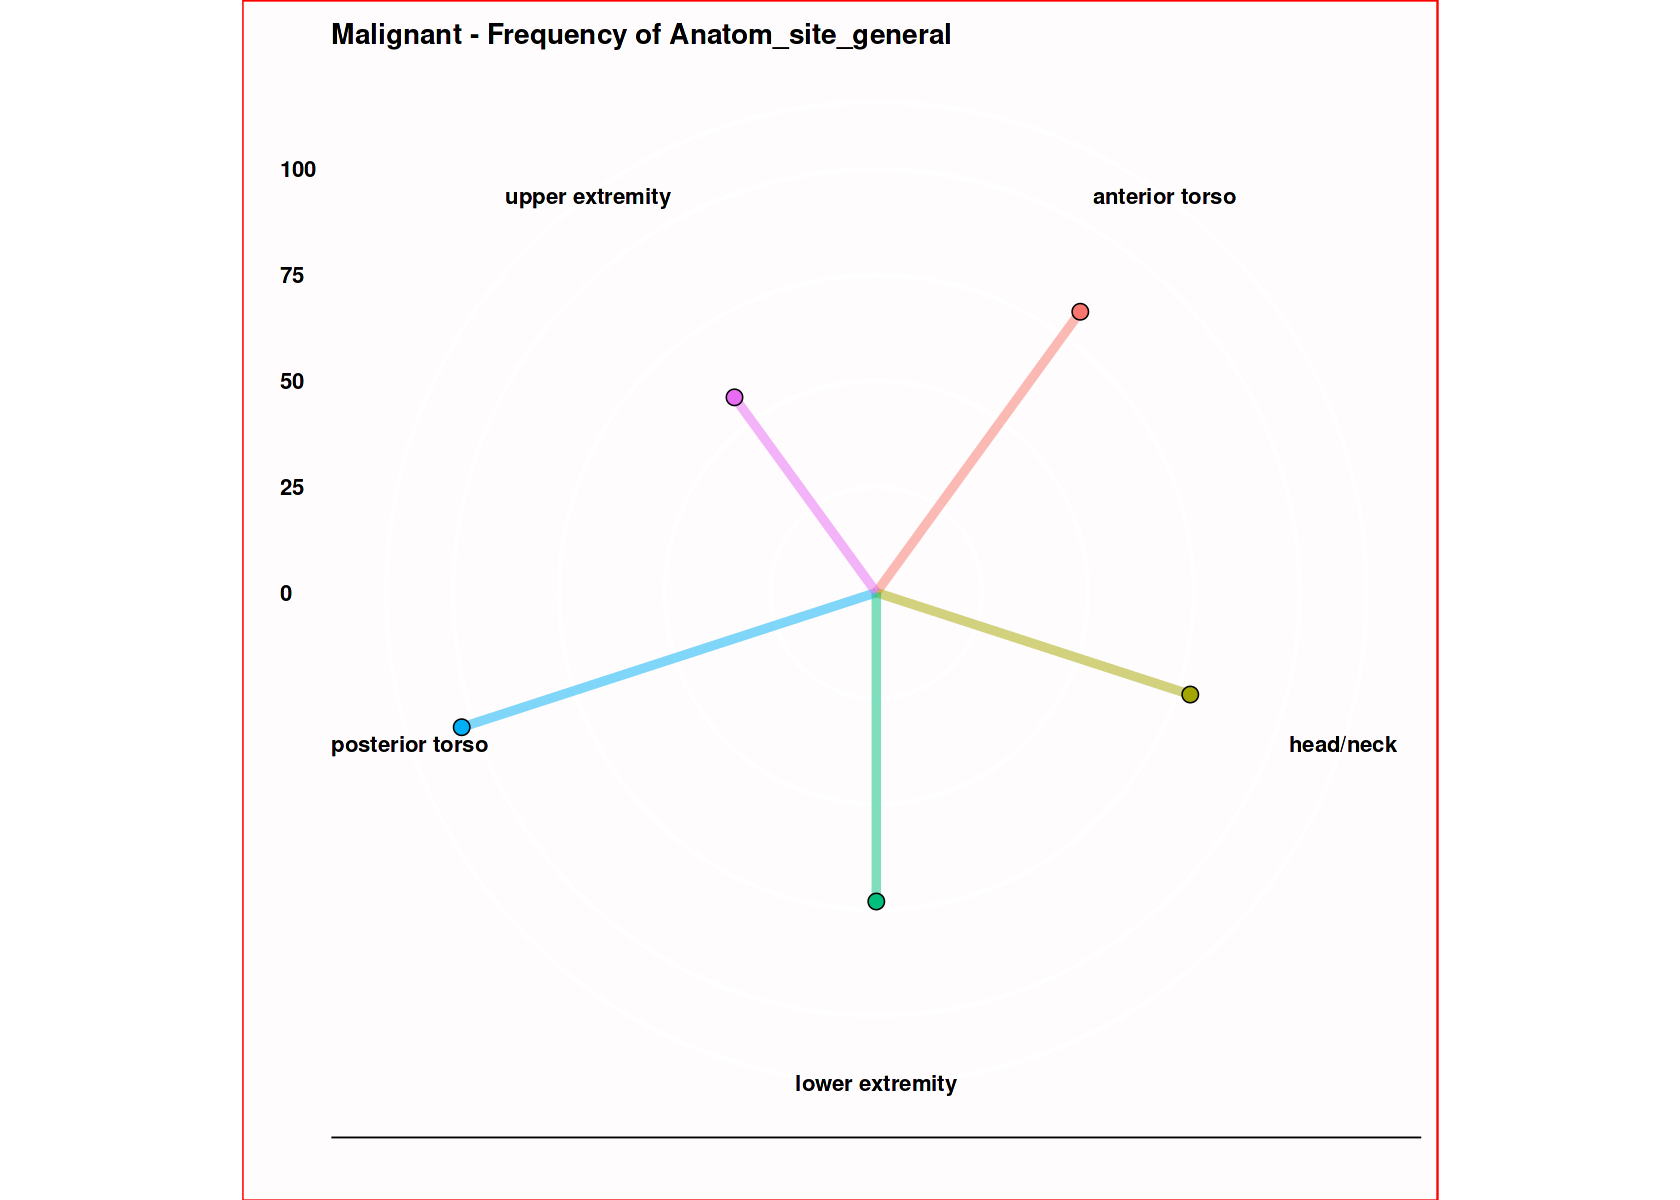

In [15]:
plot(b)
plot(b + coord_polar())

## Sex distribution 

In [16]:
freq_ben_sex <- data.frame(cbind(Frequency = table(benign_data$sex), Percent = prop.table(table(benign_data$sex)) * 100))
freq_ben_sex <- head(freq_ben_sex[order(freq_ben_sex$Frequency, decreasing = T), ], 5)
freq_ben_sex <- head(freq_ben_sex[order(freq_ben_sex$Frequency, decreasing = T), ], 5)
freq_ben_sex <- freq_ben_sex[1:2,]
freq_ben_sex

,Frequency,Percent
,<dbl>,<dbl>
male,265272,66.20776
female,123887,30.92027


In [17]:
freq_mal_sex <- data.frame(cbind(Frequency = table(malignant_data$sex), Percent = prop.table(table(malignant_data$sex)) * 100))
freq_mal_sex <- head(freq_mal_sex[order(freq_mal_sex$Frequency, decreasing = T), ], 5)
freq_mal_sex <- head(freq_mal_sex[order(freq_mal_sex$Frequency, decreasing = T), ], 5)
freq_mal_sex <- freq_mal_sex[1:2,]
freq_mal_sex

,Frequency,Percent
,<dbl>,<dbl>
male,274,69.72010
female,109,27.73537


In [18]:
a <- ggplot(data = freq_ben_sex, 5, mapping = aes(x = row.names(freq_ben_sex), y = Percent)) +
         geom_bar(stat = "identity", mapping = aes(fill = row.names(freq_ben_sex), color = row.names(freq_ben_sex)), size = 1, alpha = .7) +
         geom_label(mapping = aes(label = Frequency), color = "white", fill = "blue", size = 6, fontface = "bold") +
         xlab("") +
         ylab("") +
         ggtitle("Benign - Sex distribution") +
         theme_ipsum(base_family="sans") +
         coord_flip() +
         theme(plot.background = element_rect(fill = "#F8F8FF", color = "blue"),
               legend.position = "none",
               plot.title = element_text(size = 20, face = "bold"),
               axis.text.x = element_text(size = 14, face = "bold"),
               axis.text.y = element_text(size = 14, face = "bold"),
               axis.title.y = element_text(size = 18))

b <- ggplot(data = freq_mal_sex, mapping = aes(x = row.names(freq_mal_sex), y = Percent)) +
         geom_bar(stat = "identity", mapping = aes(fill = row.names(freq_mal_sex), color = row.names(freq_mal_sex)), size = 1, alpha = .7) +
         geom_label(mapping = aes(label = Frequency), color = "white", fill = "red", size = 6, fontface = "bold") +
         xlab("") +
         ylab("") +
         ggtitle("Malignant - Sex distribution") +
         theme_ipsum(base_family="sans") +
         coord_flip() +
         theme(plot.background = element_rect(fill = "#fffcfd", color = "red"),
               legend.position = "none",
               plot.title = element_text(size = 20, face = "bold"),
               axis.text.x = element_text(size = 14, face = "bold"),
               axis.text.y = element_text(size = 14, face = "bold"),
               axis.title.y = element_text(size = 18))

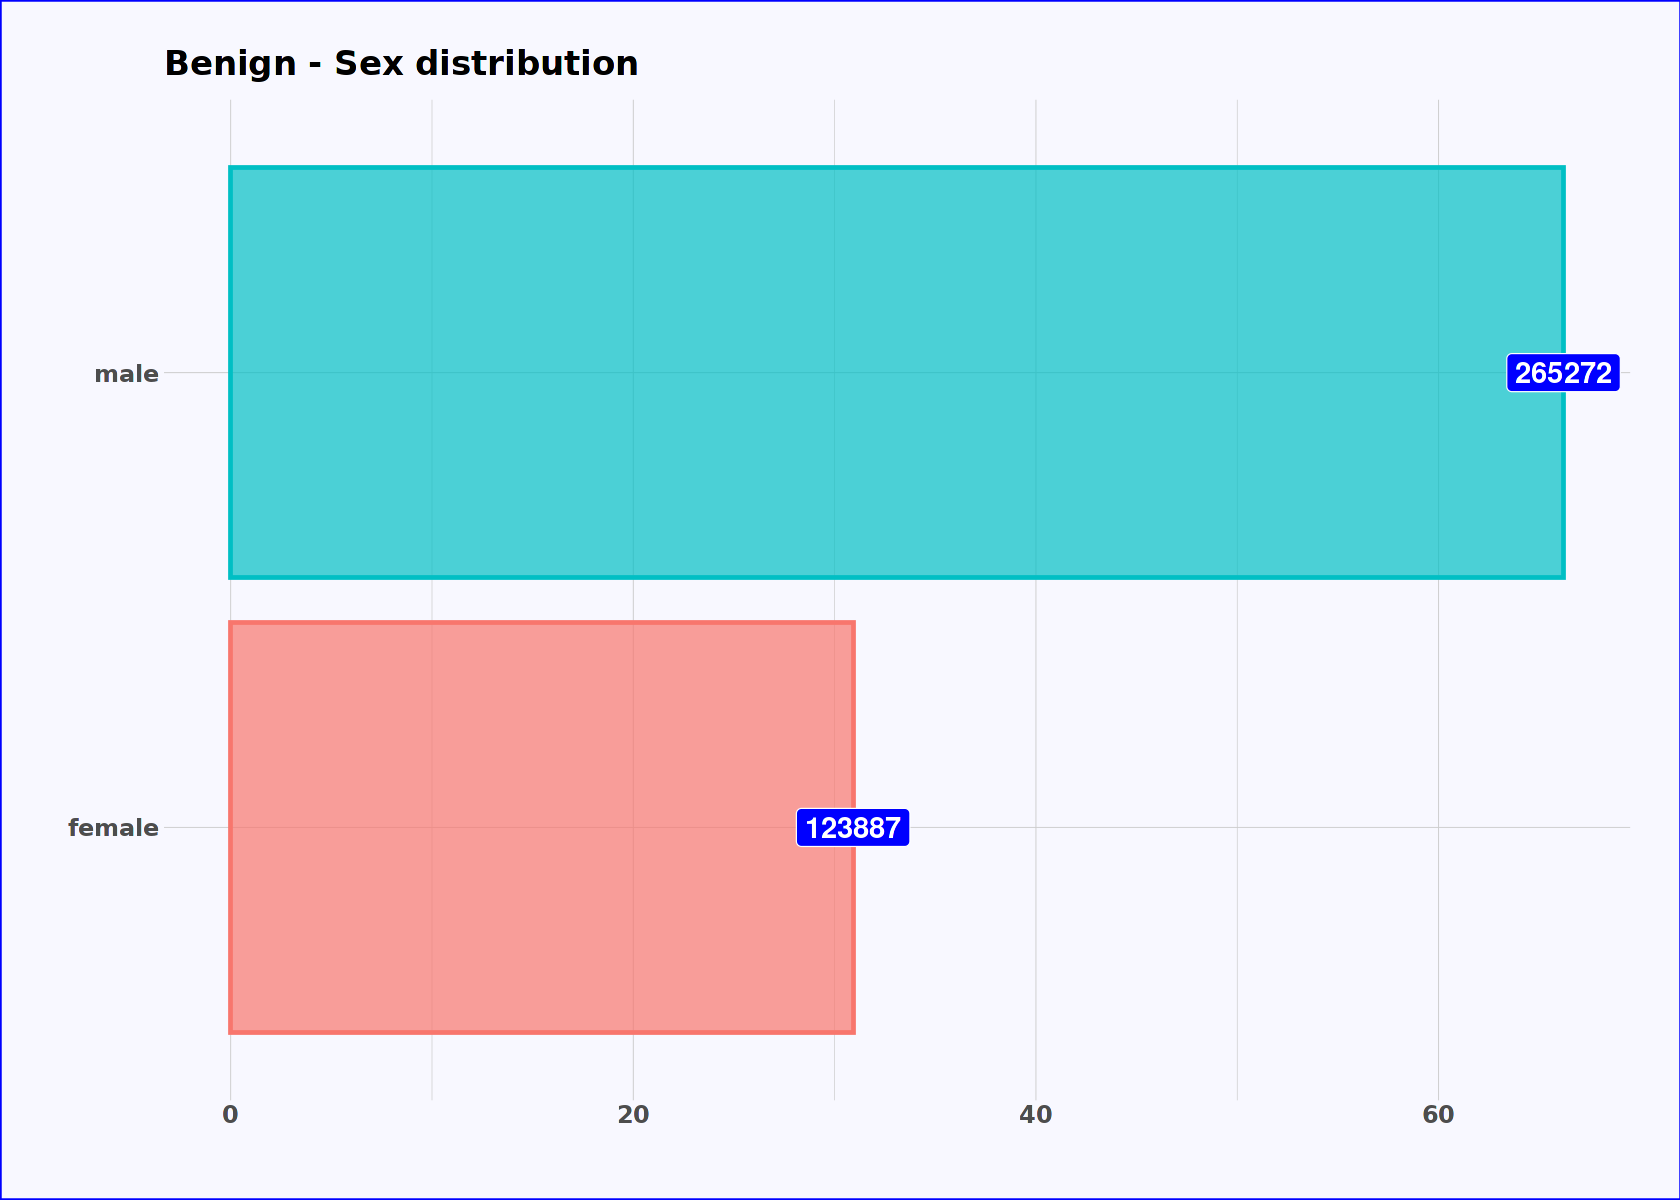

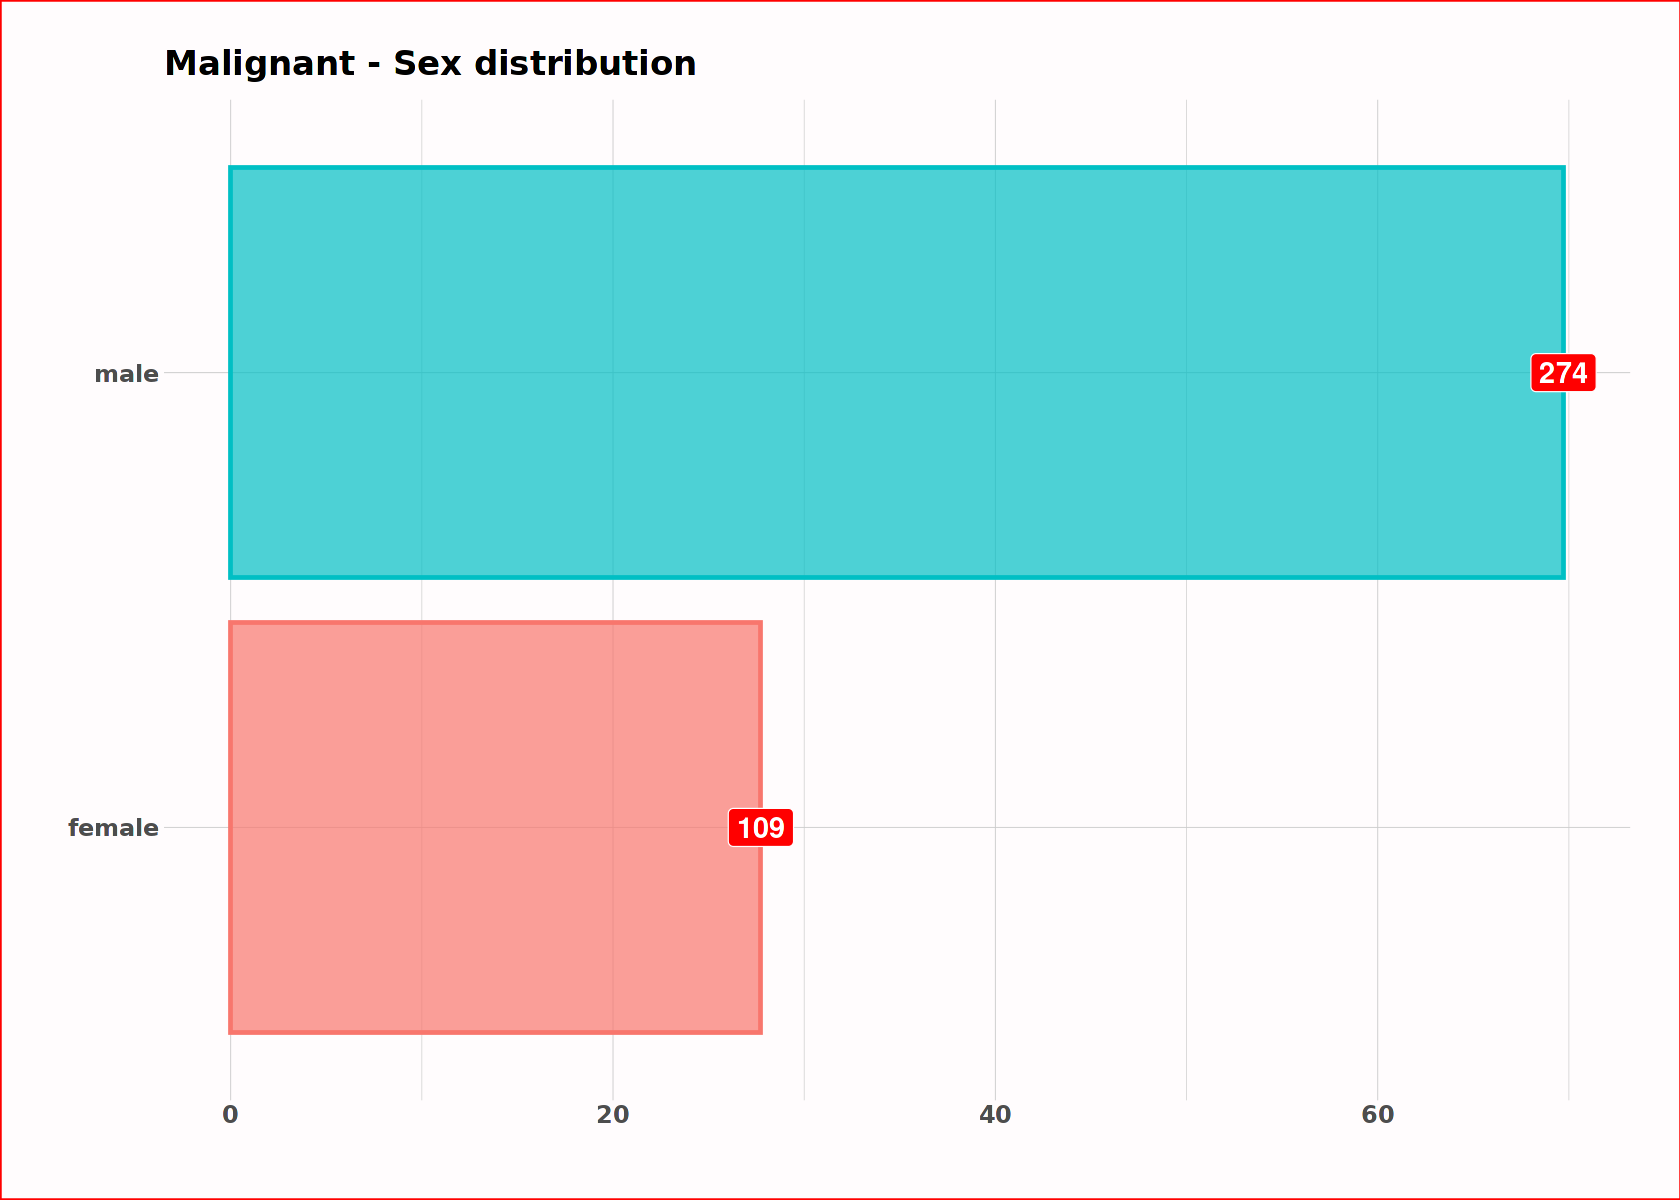

In [19]:
plot(a)
plot(b)